In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import watermark
sns.set_theme()


In [60]:
antarctic =  pd.read_csv('Datasets/antarctic.csv')

In [61]:
antarctic.head()

,#num,year,month,date,time[second],SeaIceExtent[km2]
0,0,1989,1,1,0,6991995
1,1,1989,1,2,86400,6729601
2,2,1989,1,3,172800,6524340
3,3,1989,1,4,259200,6293637
4,4,1989,1,5,345600,6072322


In [62]:
antarctic.tail()

,#num,year,month,date,time[second],SeaIceExtent[km2]
12728,12728,2024,1,21,1106179200,3380823
12729,12729,2024,1,22,1106265600,3289686
12730,12730,2024,1,23,1106352000,3211242
12731,12731,2024,1,24,1106438400,3145093
12732,12732,2024,1,25,1106524800,3067967


In [63]:
antarctic.shape

(12733, 6)

In [64]:
antarctic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12733 entries, 0 to 12732
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   #num               12733 non-null  int64
 1   year               12733 non-null  int64
 2   month              12733 non-null  int64
 3   date               12733 non-null  int64
 4   time[second]       12733 non-null  int64
 5   SeaIceExtent[km2]  12733 non-null  int64
dtypes: int64(6)
memory usage: 597.0 KB


In [65]:
antarctic.describe()

,#num,year,month,date,time[second],SeaIceExtent[km2]
count,12733.000000,12733.000000,12733.000000,12733.000000,1.273300e+04,1.273300e+04
mean,6366.000000,2006.075630,6.500668,15.719626,5.545071e+08,1.151566e+07
std,3675.844824,10.121017,3.455216,8.795925,3.194987e+08,5.608660e+06
min,0.000000,1989.000000,1.000000,1.000000,0.000000e+00,1.949420e+06
25%,3183.000000,1997.000000,4.000000,8.000000,2.777724e+08,5.924583e+06
50%,6366.000000,2006.000000,7.000000,16.000000,5.553756e+08,1.236115e+07
75%,9549.000000,2015.000000,10.000000,23.000000,8.314236e+08,1.702718e+07
max,12732.000000,2024.000000,12.000000,31.000000,1.106525e+09,2.011969e+07


In [66]:
arctic = pd.read_csv('Datasets/arctic_vishop_extent.csv', header=3)

In [67]:
arctic.head() 

,#date,SeaIceExtent
0,1978-11-01,10.472248
1,1978-11-03,10.561606
2,1978-11-05,10.758362
3,1978-11-07,10.871582
4,1978-11-09,10.973988


In [68]:
arctic.tail()

,#date,SeaIceExtent
14743,2024-01-21,13.522414
14744,2024-01-22,13.579190
14745,2024-01-23,13.617026
14746,2024-01-24,13.636070
14747,2024-01-25,13.611311


In [69]:
arctic.shape

(14748, 2)

In [70]:
arctic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14748 entries, 0 to 14747
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #date         14748 non-null  object 
 1   SeaIceExtent  14748 non-null  float64
dtypes: float64(1), object(1)
memory usage: 230.6+ KB


In [71]:
arctic.describe()

,SeaIceExtent
count,14748.000000
mean,10.849631
std,3.159607
min,3.177455
25%,8.271738
50%,11.481507
75%,13.600226
max,16.276080


In [72]:
# antarctic again

antarctic.head()

,#num,year,month,date,time[second],SeaIceExtent[km2]
0,0,1989,1,1,0,6991995
1,1,1989,1,2,86400,6729601
2,2,1989,1,3,172800,6524340
3,3,1989,1,4,259200,6293637
4,4,1989,1,5,345600,6072322


In [73]:
antarctic = (antarctic
             .drop(['time[second]'], axis=1)
             .rename(columns={'SeaIceExtent[km2]':'ice'})
             )


antarctic

,#num,year,month,date,ice
0,0,1989,1,1,6991995
1,1,1989,1,2,6729601
2,2,1989,1,3,6524340
3,3,1989,1,4,6293637
4,4,1989,1,5,6072322
...,...,...,...,...,...
12728,12728,2024,1,21,3380823
12729,12729,2024,1,22,3289686
12730,12730,2024,1,23,3211242
12731,12731,2024,1,24,3145093


In [74]:
df2 = antarctic.groupby('year')
list1= []
for i in df2:
    # shape of i
    i[1].shape if i[1].shape[0] < 365 else list1.append(i[0])

In [75]:
len(df2['year']) # all years

36

In [76]:
len(list1) # years with 365 days

21

In [77]:
# years with missing days
missing_day_years = len(df2['year']) - len(list1) -1 # -1 for 2024
missing_day_years

14

In [78]:
df1989 = antarctic[antarctic['year'] == 1989].groupby(['date'])
for i in df1989:
    print(i[1].reset_index(drop=True))

    #num  year  month  date       ice
0      0  1989      1     1   6991995
1     31  1989      2     1   3410156
2     59  1989      3     1   3113331
3     90  1989      4     1   5019323
4    120  1989      5     1   8319092
5    151  1989      6     1  12198140
6    180  1989      7     1  14935944
7    208  1989      8     1  16772004
8    239  1989      9     1  18042162
9    269  1989     10     1  17847803
10   299  1989     11     1  16829677
11   329  1989     12     1  13349983
    #num  year  month  date       ice
0      1  1989      1     2   6729601
1     32  1989      2     2   3391562
2     60  1989      3     2   3170687
3     91  1989      4     2   5078661
4    121  1989      5     2   8486363
5    152  1989      6     2  12267651
6    181  1989      7     2  14992155
7    209  1989      8     2  16800603
8    240  1989      9     2  18018479
9    270  1989     10     2  17851635
10   300  1989     11     2  16774460
11   330  1989     12     2  13174400
    #num  ye

In [79]:
# # plot the df2 per year

# for i in df2:
    # if i[1].shape[0] < 365:
    #     plt.plot(i[1]['ice'], label=i[0])
    #     plt.legend()
    #     plt.show()

In [80]:
# get the unique years

yearList = antarctic['year'].unique() # list of unique years
yearList

# antarctic[antarctic['year'] == 1989].groupby(['date'])

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [81]:
n_seaice = pd.read_csv('Datasets/N_seaice_extent_daily_v3.0.csv', header=0)
n_seaice.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [82]:
n_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [83]:
n_seaice_clean =(n_seaice
                 .drop([' Source Data'], axis=1)
                 .drop([0], axis=0)
                 )
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [84]:
n_seaice_clean.shape

(14904, 5)

In [85]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         14904 non-null  object
 1    Month       14904 non-null  object
 2    Day         14904 non-null  object
 3        Extent  14904 non-null  object
 4       Missing  14904 non-null  object
dtypes: object(5)
memory usage: 582.3+ KB


In [86]:
# Change the Year, Month, Day, Missing and Extent columns to integers
n_seaice_clean['Year'] = n_seaice_clean['Year'].astype(int)
n_seaice_clean['Month'] = n_seaice_clean[' Month'].astype(int)
n_seaice_clean['Day'] = n_seaice_clean[' Day'].astype(int)
n_seaice_clean['Extent'] = n_seaice_clean['     Extent'].astype(float)
n_seaice_clean['Missing'] = n_seaice_clean['    Missing'].astype(float)
n_seaice_clean =(n_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1)
                 )
n_seaice_clean['Date'] = pd.to_datetime(n_seaice_clean[['Year', 'Month', 'Day']])
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,10.231,0.0,1978-10-26
2,1978,10,28,10.420,0.0,1978-10-28
3,1978,10,30,10.557,0.0,1978-10-30
4,1978,11,1,10.670,0.0,1978-11-01
5,1978,11,3,10.777,0.0,1978-11-03


In [87]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14904 non-null  int64         
 1   Month    14904 non-null  int64         
 2   Day      14904 non-null  int64         
 3   Extent   14904 non-null  float64       
 4   Missing  14904 non-null  float64       
 5   Date     14904 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 698.8 KB


In [88]:
n_seaice_clean.describe()

,Year,Month,Day,Extent,Missing,Date
count,14904.000000,14904.000000,14904.000000,14904.000000,14904.0,14904
mean,2002.987386,6.526973,15.734165,11.233324,0.0,2003-06-27 18:26:16.811594240
min,1978.000000,1.000000,1.000000,3.340000,0.0,1978-10-26 00:00:00
25%,1993.000000,4.000000,8.000000,8.474750,0.0,1993-07-15 18:00:00
50%,2003.000000,7.000000,16.000000,11.969000,0.0,2003-09-27 12:00:00
75%,2013.000000,10.000000,23.000000,14.159000,0.0,2013-12-09 06:00:00
max,2024.000000,12.000000,31.000000,16.635000,0.0,2024-02-21 00:00:00
std,12.206453,3.455385,8.800818,3.316958,0.0,NaN


In [89]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14904 non-null  int64         
 1   Month    14904 non-null  int64         
 2   Day      14904 non-null  int64         
 3   Extent   14904 non-null  float64       
 4   Missing  14904 non-null  float64       
 5   Date     14904 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 698.8 KB


In [90]:
n_seaice_grouped = n_seaice_clean.groupby(['Year']).mean()
n_seaice_grouped.tail()

,Month,Day,Extent,Missing,Date
Year,,,,,
2020,6.513661,15.756831,10.149869,0.0,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,10.551784,0.0,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.661425,0.0,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,10.469770,0.0,2023-07-02 00:00:00.000000000
2024,1.403846,13.980769,14.160173,0.0,2024-01-26 12:00:00.000000000


In [108]:
# remove last row
n_seaice_grouped = n_seaice_grouped[:-1]

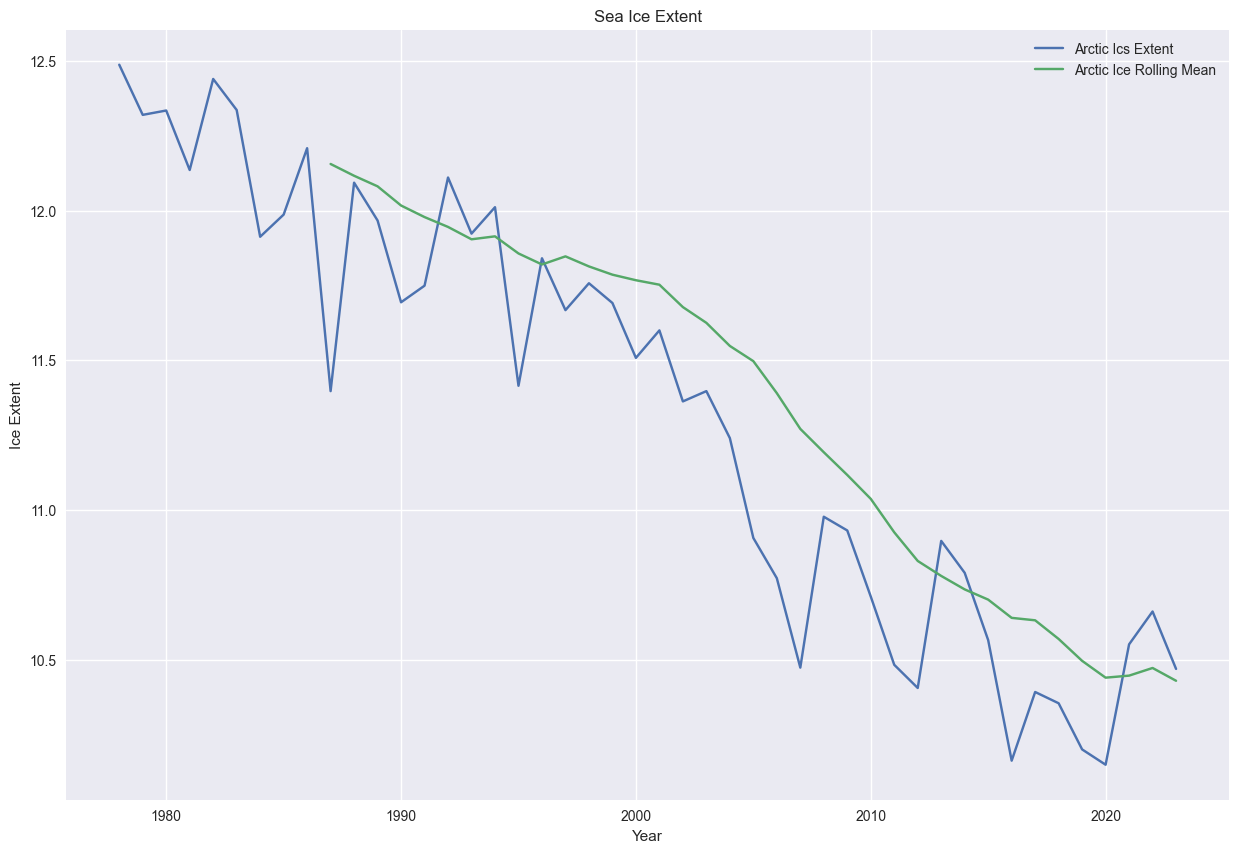

In [117]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'].rolling(window=10).mean(), label='Arctic Ice Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent')
plt.legend()
plt.show()


In [92]:
n_seaice_clean['Year'].unique()

array([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [93]:
s_seaice = pd.read_csv ('Datasets/S_seaice_extent_daily_v3.0.csv', header=0)

s_seaice.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [94]:
s_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [95]:
s_seaice_clean = (s_seaice
                  .drop([' Source Data'], axis =1)
                  .drop([0], axis=0))
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,17.624,0.000
2,1978,10,28,17.803,0.000
3,1978,10,30,17.670,0.000
4,1978,11,01,17.527,0.000
5,1978,11,03,17.486,0.000


In [96]:
s_seaice_clean.shape

(14904, 5)

In [97]:
n_seaice_clean['Year']

1        1978
2        1978
3        1978
4        1978
5        1978
         ... 
14900    2024
14901    2024
14902    2024
14903    2024
14904    2024
Name: Year, Length: 14904, dtype: int64

In [98]:
s_seaice_clean.dtypes

Year           object
 Month         object
 Day           object
     Extent    object
    Missing    object
dtype: object

In [99]:
year_mean = s_seaice_clean['Year']
year_mean

1        1978
2        1978
3        1978
4        1978
5        1978
         ... 
14900    2024
14901    2024
14902    2024
14903    2024
14904    2024
Name: Year, Length: 14904, dtype: object

In [100]:
s_seaice_clean['Year'] = pd.to_datetime(s_seaice_clean['Year'], format='%Y')

# Now 'Year' column has been converted to datetime format
year_mean = s_seaice_clean['Year']

In [101]:
year_mean

1       1978-01-01
2       1978-01-01
3       1978-01-01
4       1978-01-01
5       1978-01-01
           ...    
14900   2024-01-01
14901   2024-01-01
14902   2024-01-01
14903   2024-01-01
14904   2024-01-01
Name: Year, Length: 14904, dtype: datetime64[ns]

In [102]:
s_seaice_clean['Year'] = s_seaice_clean['Year'].dt.year
year_mean = s_seaice_clean['Year']
year_mean

1        1978
2        1978
3        1978
4        1978
5        1978
         ... 
14900    2024
14901    2024
14902    2024
14903    2024
14904    2024
Name: Year, Length: 14904, dtype: int32

In [103]:
# Change the Year, Month and Day columns to integers
s_seaice_clean['Year'] = s_seaice_clean['Year'].astype(int)
s_seaice_clean['Month'] = s_seaice_clean[' Month'].astype(int)
s_seaice_clean['Day'] = s_seaice_clean[' Day'].astype(int)
s_seaice_clean['Extent'] = s_seaice_clean['     Extent'].astype(float)
s_seaice_clean['Missing'] = s_seaice_clean['    Missing'].astype(float)
s_seaice_clean =(s_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1))
s_seaice_clean['Date'] = pd.to_datetime(s_seaice_clean[['Year', 'Month', 'Day']])
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,17.624,0.0,1978-10-26
2,1978,10,28,17.803,0.0,1978-10-28
3,1978,10,30,17.670,0.0,1978-10-30
4,1978,11,1,17.527,0.0,1978-11-01
5,1978,11,3,17.486,0.0,1978-11-03


In [107]:
s_seaice_grouped = s_seaice_clean.groupby(['Year']).mean()
s_seaice_grouped.tail()

# plot 

,Month,Day,Extent,Missing,Date
Year,,,,,
2020,6.513661,15.756831,11.602402,0.000000,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,11.578682,0.000000,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.726003,0.000000,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,9.852699,0.000164,2023-07-02 00:00:00.000000000
2024,1.403846,13.980769,3.222038,0.004558,2024-01-26 12:00:00.000000000


In [110]:
# remove last row

s_seaice_grouped = s_seaice_grouped[:-1]

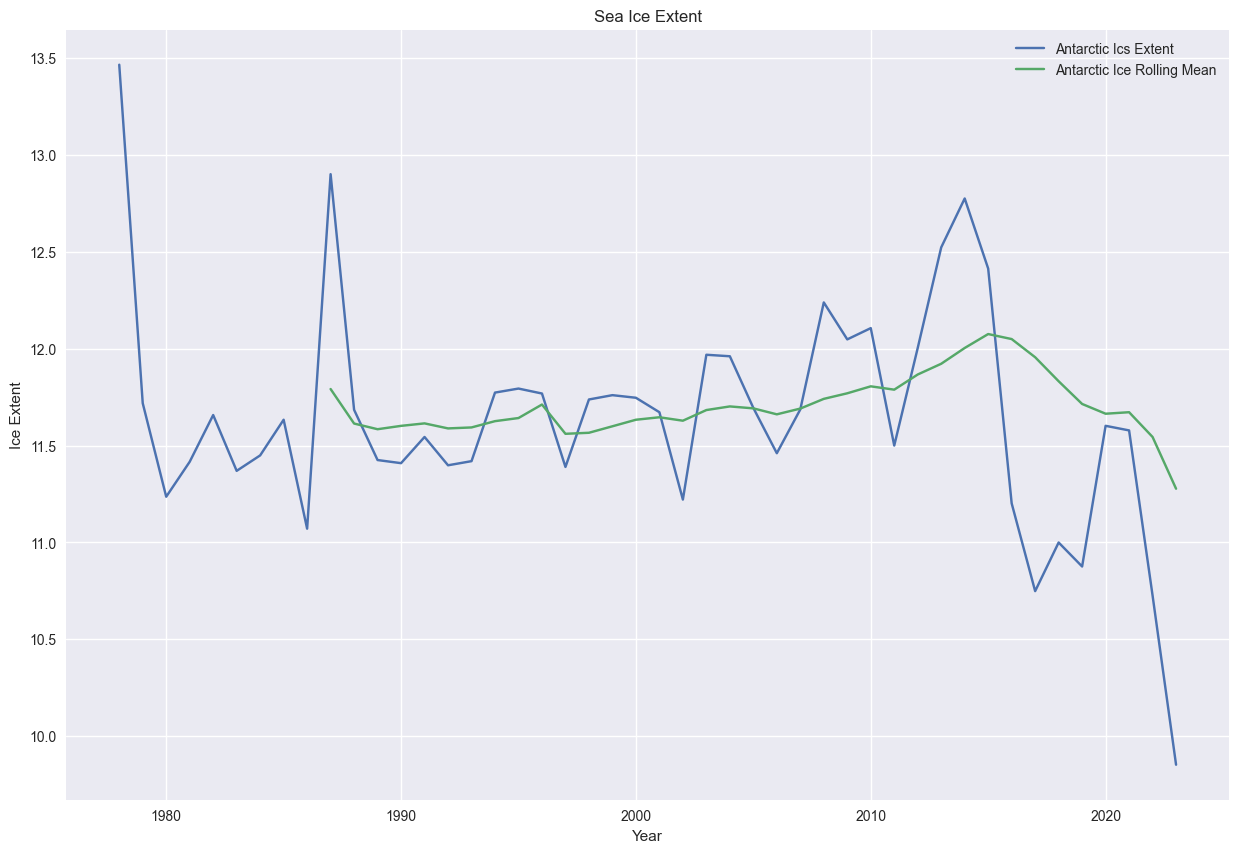

In [116]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(s_seaice_grouped['Extent'].rolling(window=10).mean(), label='Antarctic Ice Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent')
plt.legend()
plt.show()

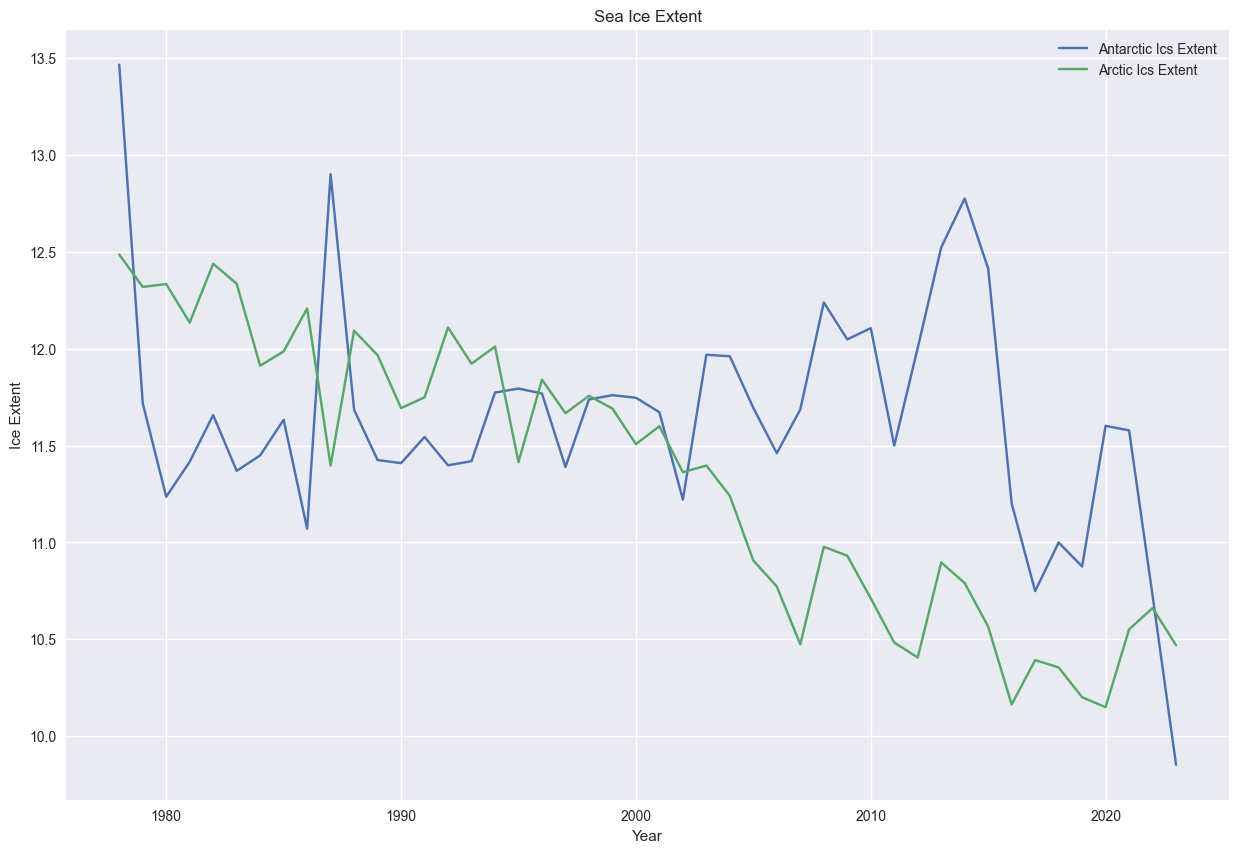

In [115]:
# plot the arctic and antarctic ice extent in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent')
plt.legend()
plt.show()
